                        TITANIC SURVIVAL PREDICTION

In [ ]:
    #TO IMPORT THE PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
    #TO READ THE FILE
df = pd.read_csv('train (3).csv')

In [ ]:
    #TO GET FIRST 5 DATA
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
    #TO GET THE STD COUNT MEAN MIN MAX & PERCENTILES
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
    #TO CHECK THE MISSING VALUES
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
    #TO GET NO:OF ROWS AND COL
df.shape

(891, 12)

In [9]:
    #TO GET UNIQUE VAL IN EACH COL
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
    #TO GET UNIQUE VAL IN EACH COL
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
    #TO GET UNIQUE VAL IN EACH COL
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
    #TO GET UNIQUE VAL IN EACH COL
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
    #TO GET UNIQUE VAL IN EACH COL
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [14]:
    #to replace the missing value in age with its mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\aziya\AppData\Local\Temp\ipykernel_11200\1131261419.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [19]:
    #to get the mode value of embarked 
mode_value = df['Embarked'].mode()
print(mode_value)

0    S
Name: Embarked, dtype: object


In [20]:
    # to replace the missing value in embarked with the mode value(here the index value for S is 0)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
 #TO REPLACE THE CATEGORICAL VALUE WITH NUMERICAL VALUE
df.replace({'Sex':{'female':0 , 'male':1 }},inplace=True)

C:\Users\aziya\AppData\Local\Temp\ipykernel_11200\859489744.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'female':0 , 'male':1 }},inplace=True)


In [24]:
 #TO REPLACE THE CATEGORICAL VALUE WITH NUMERICAL VALUE
df.replace({'Embarked':{'S':0 , 'C':1 , 'Q':2}},inplace=True)

C:\Users\aziya\AppData\Local\Temp\ipykernel_11200\1539559441.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Embarked':{'S':0 , 'C':1 , 'Q':2}},inplace=True)


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


In [28]:
    #To get no:of unique value in survived col(in o/p 0 represent not survived and 1 represent survived)
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

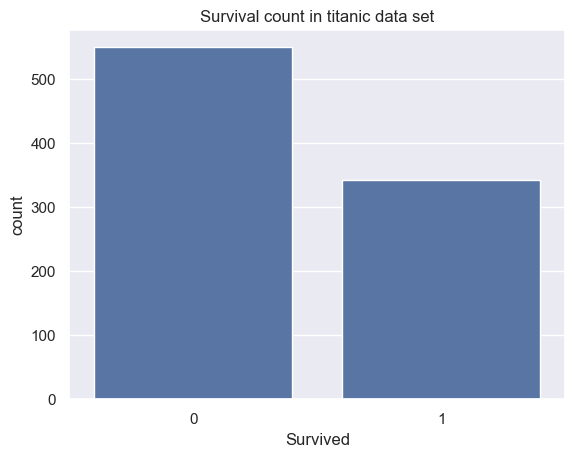

In [29]:
    #DATA VISUALIZATION
sns.set()
    #MAKING A COUNT PLOT FOR SURVIVED COLUMN
sns.countplot(x="Survived" , data=df)
plt.xlabel("Survived")
plt.ylabel("count")
plt.title("Survival count in titanic data set")
plt.show()

In [30]:
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

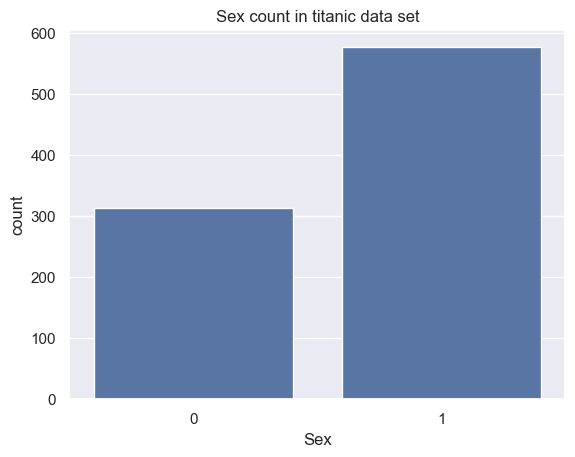

In [31]:
 #MAKING A COUNT PLOT FOR SEX COLUMN
sns.countplot(x="Sex" , data=df)
plt.xlabel("Sex")
plt.ylabel("count")
plt.title("Sex count in titanic data set")
plt.show()

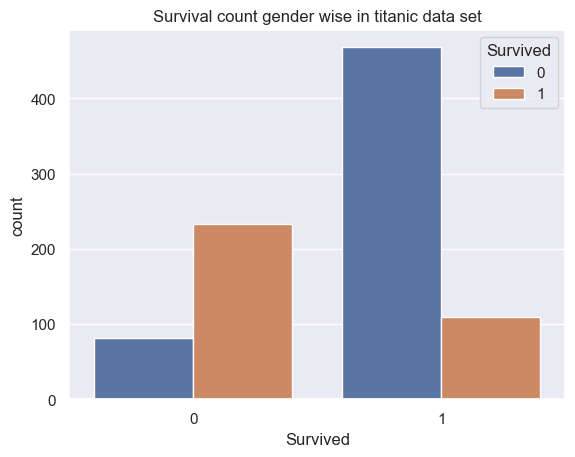

In [32]:
 #MAKING A COUNT PLOT FOR GENDER WISE SURVIVED
sns.countplot(x="Sex" ,hue="Survived", data=df)
plt.xlabel("Survived")
plt.ylabel("count")
plt.title("Survival count gender wise in titanic data set")
plt.show()

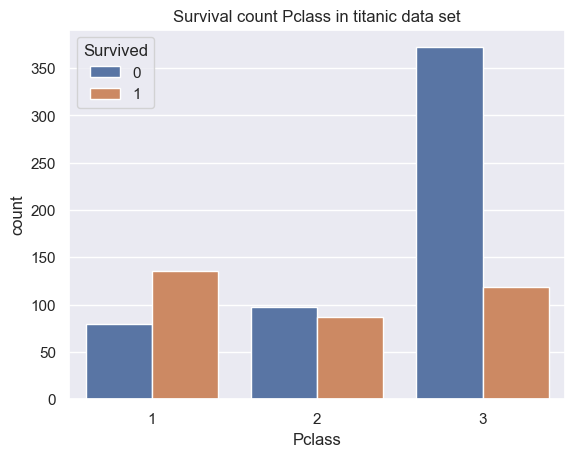

In [33]:
 #MAKING A COUNT PLOT FOR SURVIVED IN PCLASS
sns.countplot(x="Pclass" ,hue="Survived", data=df)
plt.xlabel("Pclass")
plt.ylabel("count")
plt.title("Survival count Pclass in titanic data set")
plt.show()

In [34]:
    #SPLITTING X AND y
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)
y = df['Survived']

In [ ]:
    #First 5 Data in X
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [36]:
    #First 5 Data in y
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
     #Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
    #Model slection
model = LogisticRegression()

In [41]:
 #MODEL TRAINING
model.fit(X_train,y_train)

c:\Users\aziya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
    #MODEL EVALUATION
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)

In [43]:
print(acc_score)

0.7988826815642458


In [46]:
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    # Convert 'sex' and 'embarked' to numerical if required (like 0/1 for sex)
    sex = 1 if sex.lower() == 'male' else 0
    embarked_map = {'s': 0, 'c': 1, 'q': 2}
    embarked = embarked_map[embarked.lower()]
   
    input_data = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])



    prediction = model.predict(input_data)

    if prediction[0] == 1:
        return "Survived"
    else:
        return "Did not survive"

# Example call
result = predict_survival(3, 'male', 22, 1, 0, 7.25, 's')
print("Prediction:", result)

Prediction: Did not survive


c:\Users\aziya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
